# APIs

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, MinMaxScaler
from sklearn.svm import SVR
from sklearn.datasets import load_diabetes, load_breast_cancer
from sklearn.feature_selection import SelectPercentile, SelectFromModel, RFE
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# UDFs

In [24]:
def make_wave(n_samples=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (np.sin(4 * x) + x)
    y = (y_no_noise + rnd.normal(size=len(x))) / 2
    return x.reshape(-1, 1), y

# Data Import

In [2]:
data = pd.read_csv('adult.data', index_col=False, names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
 'marital-status', 'occupation', 'relationship', 'race', 'gender',
 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
 'income'])

In [3]:
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
 'occupation', 'income']]

In [4]:
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [5]:
data.shape

(32561, 7)

# One-Hot-Encoding

In [6]:
print(f'Original Features:\n{data.columns}\n')
data_dummies = pd.get_dummies(data)
print(f'Features after dummy encoding:\n{data_dummies.columns}')

Original Features:
Index(['age', 'workclass', 'education', 'gender', 'hours-per-week',
       'occupation', 'income'],
      dtype='object')

Features after dummy encoding:
Index(['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th',
       'education_ 11th', 'education_ 12th', 'education_ 1st-4th',
       'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'gender_ Female', 'gender_ Male',
       'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', '

In [7]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,50,13,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,38,40,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,53,40,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,28,40,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [16]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']

X = features.values
y = data_dummies['income_ >50K'].values
print(f'X.shape: {X.shape}\ny.shape: {y.shape}')

X.shape: (32561, 44)
y.shape: (32561,)


# Applying Logistic Regression

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train, y_train)
print(f'Test score: {logreg.score(X_test, y_test):.2f}')

Test score: 0.81


# Binning (Discretization)

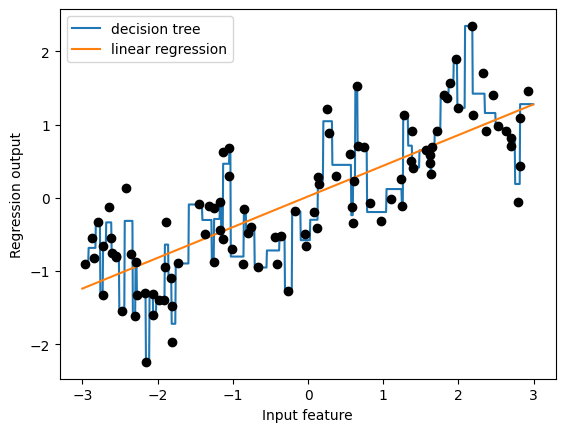

In [25]:
X, y = make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label='decision tree')

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label='linear regression')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend()

below will create 10 bins

In [22]:
bins = np.linspace(-3, 3, 11)
bins

array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ])

In [26]:
which_bin = np.digitize(X, bins=bins)
print(f'Data points:\n{X[:5]}')
print(f'\nBin membership: \n{which_bin[:5]}')

Data points:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership: 
[[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [30]:
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


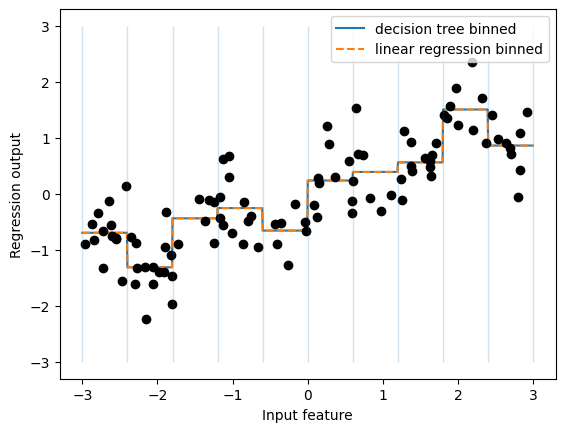

In [32]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned),'--', label='linear regression binned')

plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=0.2)
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend()

# Interactions and Polynomials

## Continuing with Wave dataset

adding back original feature in the model

In [33]:
X_combined = np.hstack([X, X_binned])

print(X_combined.shape)

(100, 11)


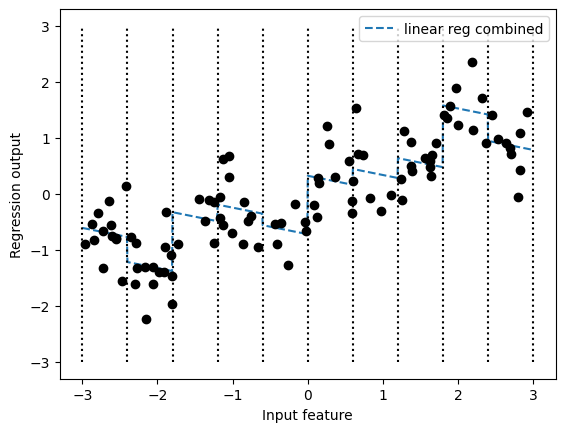

In [35]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), '--', label='linear reg combined')
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend()

this gives same slope for all the bins. 

Below code tries to capture interaction which bin a data point is in

In [36]:
X_prod = np.hstack([X_binned, X * X_binned])
print(X_prod.shape)

(100, 20)


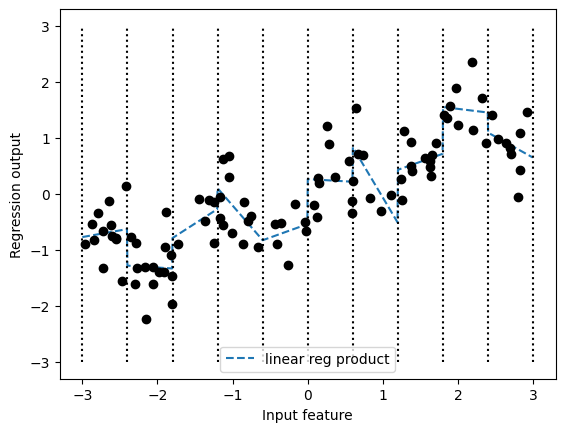

In [37]:
reg = LinearRegression().fit(X_prod, y)

line_prod = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_prod), '--', label='linear reg product')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend()

### Polynomial

In [39]:
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)
print(f'shape of poly X: {X_poly.shape}')

shape of poly X: (100, 10)


In [41]:
print(f'values for X_poly:\n{X_poly[:2]}')

values for X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]]


In [43]:
print(f'feature names:\n{poly.get_feature_names_out()}')

feature names:
['x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10']


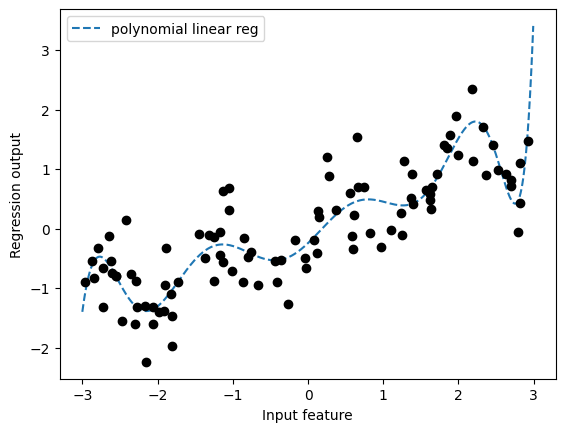

In [44]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), '--', label='polynomial linear reg')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend()

extreme results on the boundaries: -3 & 3

### SVR comparison w/o Poly

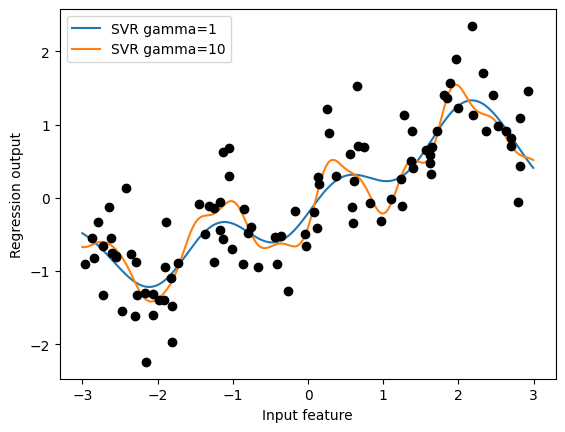

In [46]:
for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label=f'SVR gamma={gamma}')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend()

## Diabetes dataset

In [51]:
diabetes = load_diabetes()

In [53]:
print(f'Max value per feature:\n{diabetes.data.max(axis=0)}\n')
print(f'Min value per feature:\n{diabetes.data.min(axis=0)}')

Max value per feature:
[0.11072668 0.05068012 0.17055523 0.13204362 0.15391371 0.19878799
 0.18117906 0.18523444 0.13359728 0.13561183]

Min value per feature:
[-0.10722563 -0.04464164 -0.0902753  -0.1123988  -0.12678067 -0.11561307
 -0.10230705 -0.0763945  -0.12609712 -0.13776723]


In [54]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=0)

In [55]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_train_poly: {X_train_poly.shape}')

Shape of X_train: (331, 10)
Shape of X_train_poly: (331, 66)


In [61]:
print(f'Poly features name:\n{poly.get_feature_names_out()}')

Poly features name:
['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x0^2' 'x0 x1'
 'x0 x2' 'x0 x3' 'x0 x4' 'x0 x5' 'x0 x6' 'x0 x7' 'x0 x8' 'x0 x9' 'x1^2'
 'x1 x2' 'x1 x3' 'x1 x4' 'x1 x5' 'x1 x6' 'x1 x7' 'x1 x8' 'x1 x9' 'x2^2'
 'x2 x3' 'x2 x4' 'x2 x5' 'x2 x6' 'x2 x7' 'x2 x8' 'x2 x9' 'x3^2' 'x3 x4'
 'x3 x5' 'x3 x6' 'x3 x7' 'x3 x8' 'x3 x9' 'x4^2' 'x4 x5' 'x4 x6' 'x4 x7'
 'x4 x8' 'x4 x9' 'x5^2' 'x5 x6' 'x5 x7' 'x5 x8' 'x5 x9' 'x6^2' 'x6 x7'
 'x6 x8' 'x6 x9' 'x7^2' 'x7 x8' 'x7 x9' 'x8^2' 'x8 x9' 'x9^2']


# Effect of interactions

In [77]:
ridge = Ridge().fit(X_train_scaled, y_train)
print(f'Score w/o interaction: {ridge.score(X_test_scaled, y_test):.3f}')

ridge = Ridge(alpha=20).fit(X_train_poly, y_train)
print(f'Score w/o interaction: {ridge.score(X_test_poly, y_test):.3f}')

Score w/o interaction: 0.367
Score w/o interaction: 0.397


# Univariate Nonlinear Transformations

## synthetic dataset 

In [119]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [120]:
print(f'No of feature appearances:\n{np.bincount(X[:, 0])}')

No of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, 'Value')

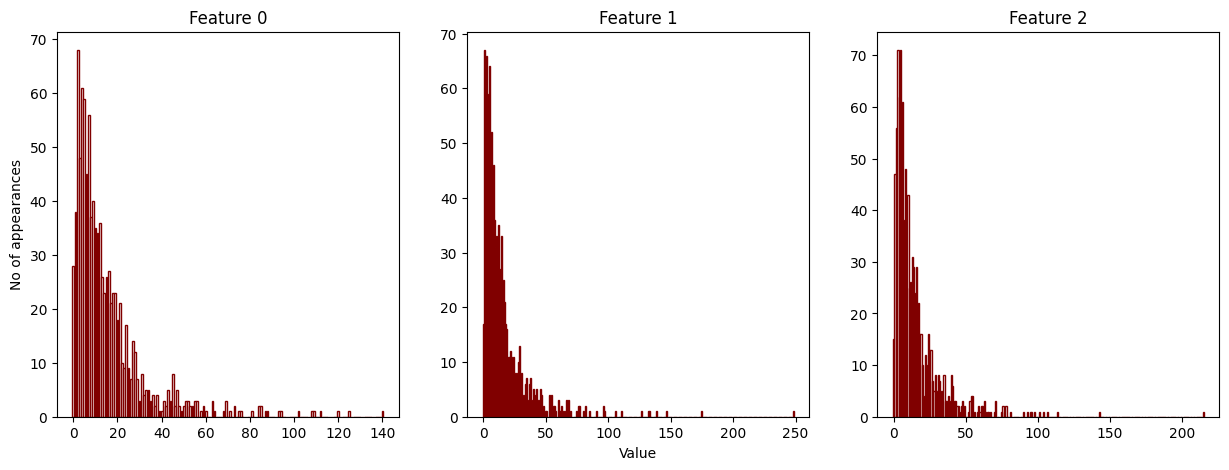

In [121]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for col, ax in zip(range(X.shape[1]), axes):
    bins = np.bincount(X[:, col])
    ax.bar(range(len(bins)), bins, color='w', edgecolor='maroon')
    ax.set_title(f'Feature {col}')

axes[0].set_ylabel('No of appearances')
axes[1].set_xlabel('Value')

Ridge on original data

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


Applying log

In [123]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, 'Value')

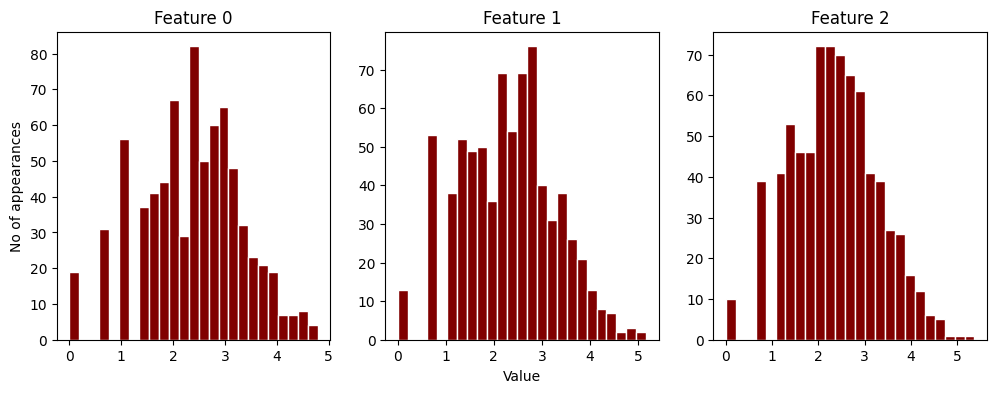

In [124]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for col, ax in zip(range(X.shape[1]), axes):
    ax.hist(X_train_log[:, col], bins=25, color='maroon', edgecolor='w')
    ax.set_title(f'Feature {col}')

axes[0].set_ylabel('No of appearances')
axes[1].set_xlabel('Value')

Ridge on transformed data

In [125]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.875


# Automatic Feature Selection

added noise(uninformative features) to original data

In [200]:
cancer = load_breast_cancer()
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

X_w_noise = np.hstack([cancer.data, noise])

## SelectPercentile

Use of SelectPercentile to select imp features automatically

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=0.5)

select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)
print(f'Shape of data with noise: {X_train.shape}')
print(f'Shape of selected data: {X_train_selected.shape}')

Shape of data with noise: (284, 80)
Shape of selected data: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([<matplotlib.axis.YTick at 0x1f62664d090>], [Text(0, 0, '0')])

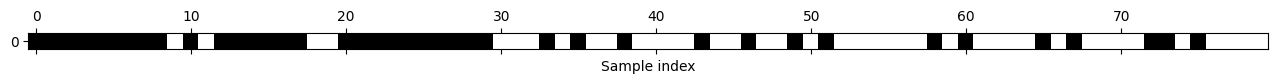

In [139]:
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel('Sample index')
plt.yticks([0])

model performance after feature selection

In [147]:
X_test_selected = select.transform(X_test)

lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
print(f'Score with all features: {lr.score(X_test, y_test):.3f}')

lr.fit(X_train_selected, y_train)
print(f'Score with only selected features: {lr.score(X_test_selected, y_test):.3f}')

Score with all features: 0.951
Score with only selected features: 0.933


## SelectFromModel

In [151]:
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')

In [152]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print(f'Shape of data with noise: {X_train.shape}')
print(f'Shape of selected data: {X_train_l1.shape}')

Shape of data with noise: (284, 80)
Shape of selected data: (284, 40)


([<matplotlib.axis.YTick at 0x1f623171310>], [Text(0, 0, '0')])

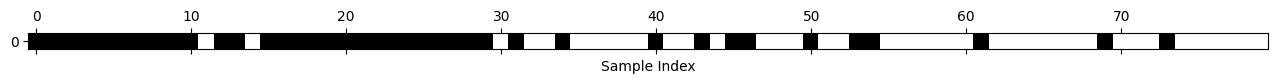

In [155]:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel('Sample Index')
plt.yticks([0])

In [156]:
X_test_l1 = select.transform(X_test)

lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
print(f'Score with all features: {lr.score(X_test, y_test):.3f}')

lr.fit(X_train_l1, y_train)
print(f'Score with only selected features: {lr.score(X_test_l1, y_test):.3f}')

Score with all features: 0.951
Score with only selected features: 0.947


## Iterative Feature Selection

In [158]:
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)

([<matplotlib.axis.YTick at 0x1f61d55e5d0>], [Text(0, 0, '0')])

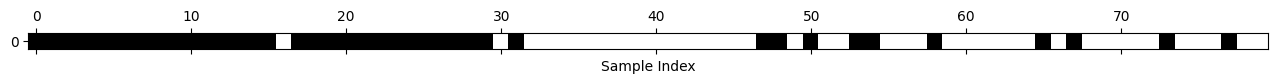

In [159]:
select.fit(X_train, y_train)

mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel('Sample Index')
plt.yticks([0])

In [160]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

lr.fit(X_train_rfe, y_train)
print(f'Score with only selected features: {lr.score(X_test_rfe, y_test):.3f}')

Score with only selected features: 0.940


In [162]:
print(f'Test score with model inside rfe: {select.score(X_test, y_test):.3f}')

Test score with model inside rfe: 0.951


# Expert Knowledge

In [202]:
citibike = pd.read_csv('citibike.csv')
citibike.shape

(4212, 15)

In [203]:
citibike.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [204]:
citibike['starttime'] = pd.to_datetime(citibike.starttime)
print(f'Date Range: {citibike.starttime.min()} to {citibike.starttime.max()}')
citibike['one'] = 1
data = citibike.set_index('starttime')
data_resampled = data.resample('3h').sum().fillna(0)
cb_resampled = data_resampled['one']
cb_resampled.head()

Date Range: 2015-08-01 01:19:15 to 2015-08-31 23:53:03


starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3h, Name: one, dtype: int64

Text(0, 0.5, 'Rentals')

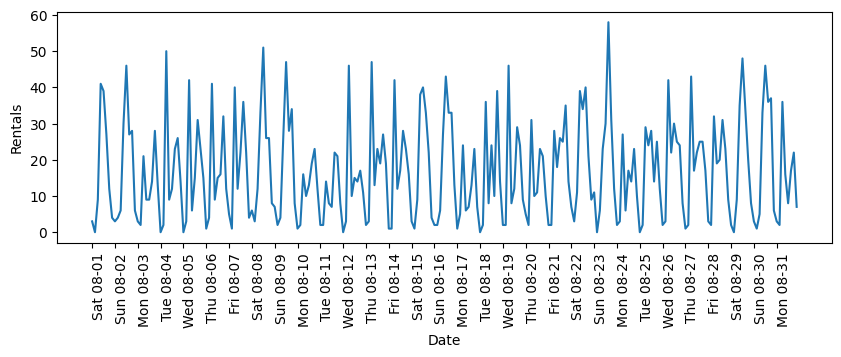

In [205]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=cb_resampled.index.min(), end=cb_resampled.index.max(), freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha='left')
plt.plot(cb_resampled)
plt.xlabel('Date')
plt.ylabel('Rentals')

Evaluating the model

In [218]:
y = cb_resampled.values

X = cb_resampled.index.astype(np.int64).to_numpy().reshape(-1, 1)
X.shape

(248, 1)

use first 184 points for training and the rest for testing

In [231]:
n_train = 184

def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print(f'Test set R^2: {regressor.score(X_test, y_test):.3f}')

    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)

    plt.figure(figsize=(10, 3))
    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90, ha='left')
    plt.plot(range(n_train), y_train, label='train', c='navy')
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label='test', c='r')
    plt.plot(range(n_train), y_pred_train, '--', label='prediction train', c='lime')
    plt.plot(range(n_train, len(y_test)+n_train), y_pred, '--', label='prediction test', c='aqua')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Rentals')

In [232]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)

with only time in seconds since 1970 as feature

Test set R^2: -0.035


<Figure size 640x480 with 0 Axes>

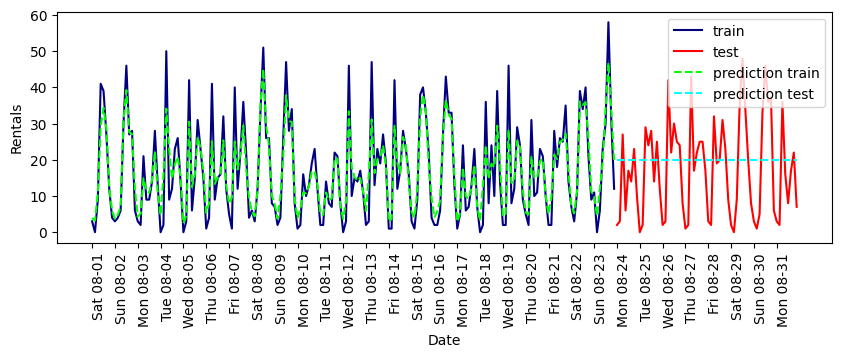

In [233]:
plt.figure()
eval_on_features(X, y, regressor)

with hour of day as feature

Test set R^2: 0.600


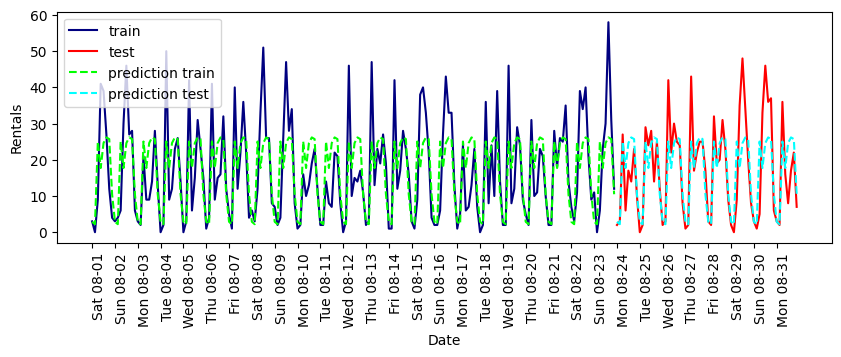

In [238]:
X_hour = cb_resampled.index.hour.to_numpy().reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

adding day of the week as well

In [239]:
X_hour_day = np.hstack([cb_resampled.index.day_of_week.to_numpy().reshape(-1, 1),
                        cb_resampled.index.hour.to_numpy().reshape(-1, 1)])
X_hour_day.shape

(248, 2)

Test set R^2: 0.842


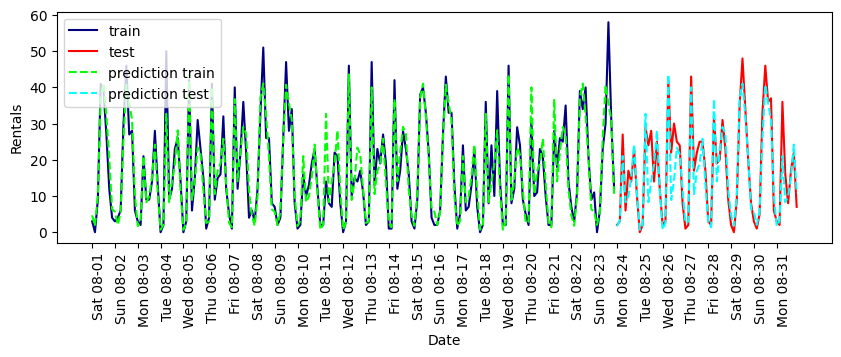

In [240]:
eval_on_features(X_hour_day, y, regressor)

Test set R^2: 0.132


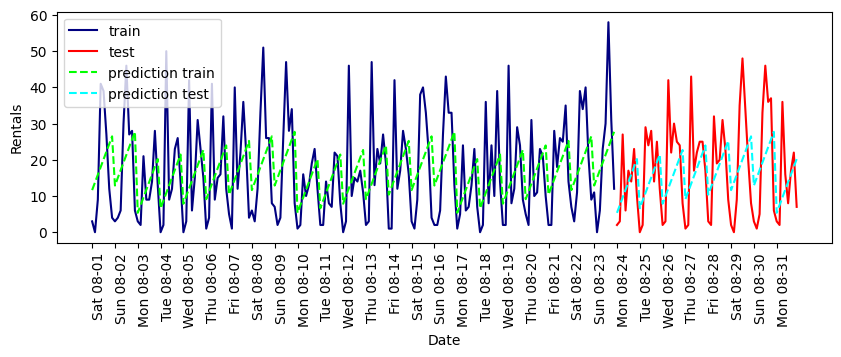

In [241]:
eval_on_features(X_hour_day, y, LinearRegression())

In [244]:
enc = OneHotEncoder()
X_hour_day_onehot = enc.fit_transform(X_hour_day).toarray()

In [245]:
X_hour_day_onehot.shape

(248, 15)

Test set R^2: 0.619


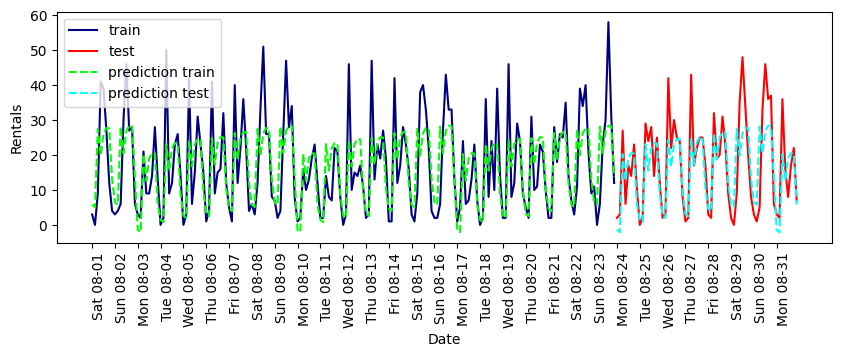

In [246]:
eval_on_features(X_hour_day_onehot, y, Ridge())

Test set R^2: 0.845


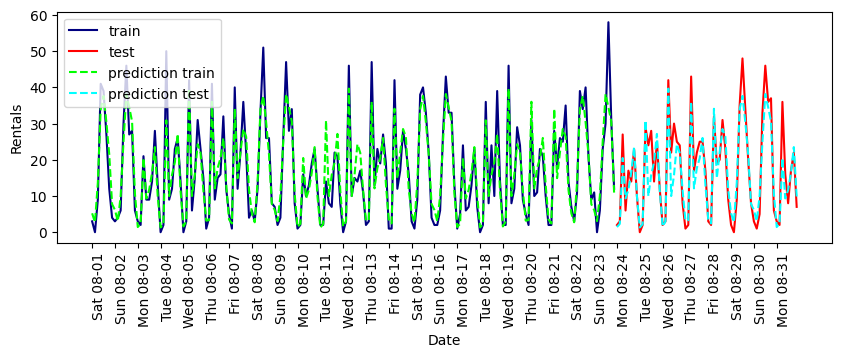

In [247]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_hour_day_onehot_poly = poly_transformer.fit_transform(X_hour_day_onehot)

lr = Ridge()
eval_on_features(X_hour_day_onehot_poly, y, lr)

Linear model coefficients

In [251]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
features = day + hour

In [252]:
features_poly = poly_transformer.get_feature_names_out(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

Text(0, 0.5, 'Feature magnitude')

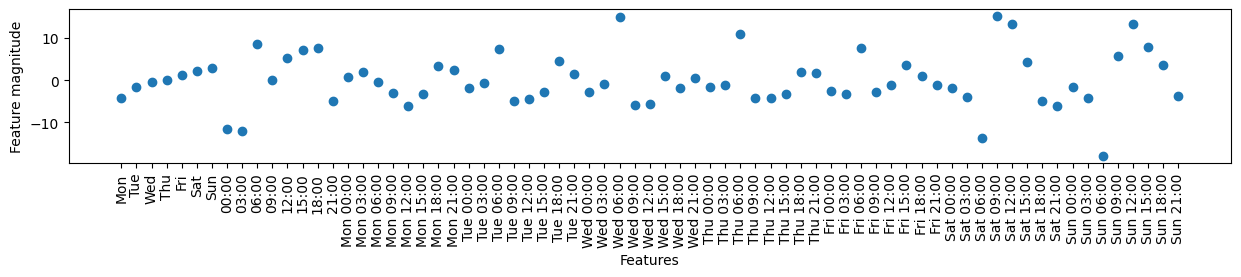

In [253]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature magnitude')